In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

In [86]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

hard_voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')

soft_voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='soft')

In [8]:
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [9]:
for clf in voting_clf.estimators_ + [hard_voting_clf] :
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.896


In [10]:
for clf in voting_clf.estimators_ + [soft_voting_clf] :
    print(clf.__class__.__name__, clf.score(X_test, y_test))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.912


In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [30]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [31]:
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.92


In [32]:
print(tree_clf.__class__.__name__, accuracy_score(y_test, y_pred_tree))

DecisionTreeClassifier 0.856


In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

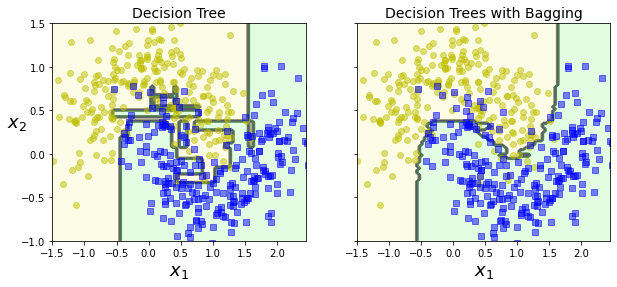

In [34]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

In [87]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [95]:
len(bag_clf.estimators_samples_[0])

100

In [64]:
bag_clf.oob_score_

0.9226666666666666

In [66]:
bag_clf.oob_decision_function_[:10]

array([[0.32887701, 0.67112299],
       [0.43116883, 0.56883117],
       [1.        , 0.        ],
       [0.00797872, 0.99202128],
       [0.02770781, 0.97229219],
       [0.0984456 , 0.9015544 ],
       [0.41578947, 0.58421053],
       [0.06965174, 0.93034826],
       [0.94545455, 0.05454545],
       [0.8381201 , 0.1618799 ]])

In [67]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [68]:
y_pred_rf = rnd_clf.predict(X_test)

## MNIST datasets

In [72]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [98]:
X, y = mnist['data'], mnist['target']

In [99]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Random patches

In [100]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500, max_samples=1.0, n_jobs=-1, bootstrap=True,
    bootstrap_features=True, max_features=1.0)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, n_estimators=500, n_jobs=-1)

In [101]:
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9659


## Random subspaces

In [ ]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,max_samples=1.0, bootstrap=False, n_jobs=-1,
    bootstrap_features=True, max_features=0.5)
bag_clf.fit(X_train, y_train)

In [77]:
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9728


## Bagging classifier

In [82]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [81]:
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.8501


## Random patches, Random subspaces, Bagging classifier accuracy compare
### Dataset : MNIST

1. Random patches
    - 0.9659
2. Random subspaces
    - 0.9728
3. Bagging classifier
    - 0.8501

In [106]:
from sklearn.datasets import load_iris

iris = load_iris()

In [107]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name ,score)

sepal length (cm) 0.0979173167491371
sepal width (cm) 0.02500435431944561
petal length (cm) 0.43109077152891206
petal width (cm) 0.44598755740250523


In [110]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(mnist['data'], mnist['target'])

for name, score in zip(mnist['feature_names'], rnd_clf.feature_importances_):
    print(name ,score)

pixel1 0.0
pixel2 0.0
pixel3 0.0
pixel4 0.0
pixel5 0.0
pixel6 0.0
pixel7 0.0
pixel8 0.0
pixel9 0.0
pixel10 0.0
pixel11 0.0
pixel12 0.0
pixel13 0.0
pixel14 6.212325220066807e-08
pixel15 6.178649670547431e-08
pixel16 5.716290014072065e-08
pixel17 0.0
pixel18 0.0
pixel19 0.0
pixel20 0.0
pixel21 0.0
pixel22 0.0
pixel23 0.0
pixel24 0.0
pixel25 0.0
pixel26 0.0
pixel27 0.0
pixel28 0.0
pixel29 0.0
pixel30 0.0
pixel31 0.0
pixel32 0.0
pixel33 0.0
pixel34 6.222785681805112e-08
pixel35 1.5659272483314184e-06
pixel36 1.0021804382864688e-06
pixel37 1.4789417246423247e-06
pixel38 3.139411733479807e-06
pixel39 2.0770398222876863e-06
pixel40 6.179874745738218e-06
pixel41 2.2747726623596887e-06
pixel42 3.0953535485822387e-06
pixel43 3.4302597067864868e-06
pixel44 4.1203842697510116e-06
pixel45 3.690570587705935e-06
pixel46 1.8755070318352368e-06
pixel47 1.00573246399092e-06
pixel48 1.9053247356061404e-06
pixel49 4.245764172404709e-07
pixel50 3.916809444978614e-07
pixel51 6.682308479157086e-07
pixel52 4.

pixel631 0.00170966678664688
pixel632 0.001363488625499162
pixel633 0.0012165208817312943
pixel634 0.0010254020222351724
pixel635 0.0008586299445699102
pixel636 0.0006813341735023798
pixel637 0.00045081109107094616
pixel638 0.00029264173739596304
pixel639 0.00013428021994970696
pixel640 6.348559303475925e-05
pixel641 2.2024589620546748e-05
pixel642 5.692565574833406e-06
pixel643 1.1035892139257761e-06
pixel644 0.0
pixel645 0.0
pixel646 0.0
pixel647 1.0308641015814183e-06
pixel648 1.4057758136145686e-05
pixel649 6.421336441391977e-05
pixel650 0.00013974363201524237
pixel651 0.00035161361906049766
pixel652 0.0007996866422575832
pixel653 0.0015249391525137671
pixel654 0.0021325470741187925
pixel655 0.0033310240590305514
pixel656 0.003443257162586818
pixel657 0.004976497721597501
pixel658 0.004640388799166407
pixel659 0.0035848705982485505
pixel660 0.002674126196916939
pixel661 0.0017469275266093621
pixel662 0.001112019567809065
pixel663 0.0007179026591214982
pixel664 0.0003865804329350637

In [117]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.hot,
              interpolation='nearest')
    plt.axis('off')

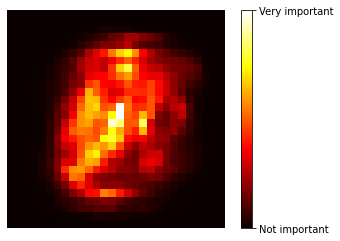

In [116]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()